In [103]:
import pandas as pd

In [104]:
datafile = "/Users/damoncrockett/twitter-atlas/tables/sample_all_huepeak_HSV.csv"

#### quick whitespace fix

In [88]:
tmp = "/Users/damoncrockett/Desktop/twitter15000.csv"

In [89]:
tmp = pd.read_csv(tmp)

In [100]:
tmp.folderbasename = [item.translate(None," ") for item in tmp.folderbasename]

In [101]:
#tmp.to_csv("/Users/damoncrockett/Desktop/twitter15000.csv",index=False)

### Load data

In [105]:
df = pd.read_csv(datafile)

In [106]:
folderbasenames = []
for i in range(len(df)):
    local_path = df.local_path.loc[i]
    basename = df.basename.loc[i]
    city = local_path.split("/")[5]
    monthyear = str(df.monthyear.loc[i])
    folderstring = city+monthyear
    folderbasename = folderstring + "/" + basename
    folderbasenames.append(folderbasename)

In [107]:
df['folderbasename'] = [item.translate(None," ") for item in folderbasenames]

In [108]:
#df.to_csv("/Users/damoncrockett/Desktop/twitter15000.csv",index=False)

In [109]:
MACDIR = "/Users/damoncrockett/Desktop/sample/"

In [110]:
df['macpath'] = [MACDIR + item for item in df.folderbasename]

In [111]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
from PIL import Image,ImageDraw

### Setup model and download weights

In [121]:
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow ONLY
    "resnet": ResNet50
}

In [146]:
modelname = "xception"

In [147]:
inputShape = (224, 224) # for vgg16, which is the modelname default
preprocess = imagenet_utils.preprocess_input

if modelname in ("inception", "xception"):
    inputShape = (299, 299)
    preprocess = preprocess_input

In [148]:
Network = MODELS[modelname]
model = Network(weights="imagenet")

91742208/91884032 [============================>.] - ETA: 0s

### Run prediction on a chosen image

In [149]:
import time
from IPython.display import display,clear_output

In [150]:
predlist = []

14998


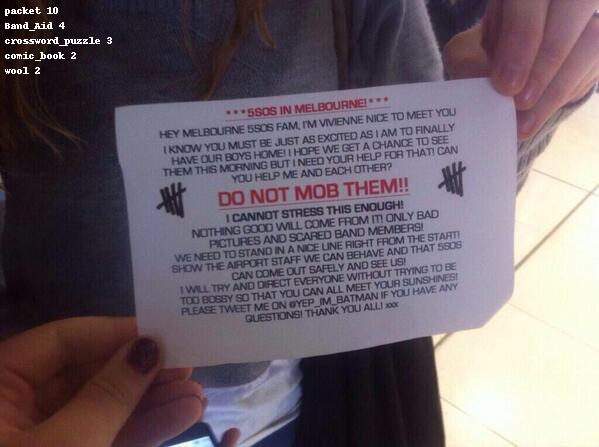

In [151]:
for i in range(len(df)):
    path = df.macpath.loc[i]
    
    # tagging
    image = load_img(path, target_size=inputShape)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess(image)

    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)
    predlist.append([item[1:] for item in P[0]])
    
    # for display
    if np.random.binomial(1,0.1)==1:
        im = Image.open(path)
        draw = ImageDraw.Draw(im)
        labels = [item[1] for item in P[0]]
        scores = [str(int(item[2]*100)) for item in P[0]]
        textstring = labels[0]+" "+scores[0]+"\n"+labels[1]+" "+scores[1]+"\n"+labels[2]+" "+scores[2]+"\n"+labels[3]+" "+scores[3]+"\n"+labels[4]+" "+scores[4]
        draw.text((5,5),textstring)

        clear_output()
        print i
        display(im)

In [152]:
df[modelname] = predlist

In [153]:
df.to_csv("/Users/damoncrockett/Desktop/tagged-sample.csv",index=False)